In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardataset/data.csv


In [28]:
dataset = pd.read_csv("/kaggle/input/cardataset/data.csv")
dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [29]:
dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [30]:
dataset = dataset.dropna(subset=["Engine Fuel Type"])
dataset["Engine HP"] = dataset["Engine HP"].fillna(dataset["Engine HP"].mean())
dataset["Engine Cylinders"] = dataset["Engine Cylinders"].fillna(dataset["Engine Cylinders"].mean())
dataset["Number of Doors"] = dataset["Number of Doors"].fillna(dataset["Number of Doors"].mode()[0])
dataset["Market Category"] = dataset["Market Category"].fillna("Unknown")

In [31]:
dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [32]:
dataset = dataset.drop(columns = "Model")
dataset = dataset.drop(columns = "Market Category")
top_makes = dataset["Make"].value_counts().nlargest(15).index
dataset["Make"] = dataset["Make"].apply(lambda x: x if x in top_makes else "Other")
dataset = pd.get_dummies(dataset,columns = ["Make"],prefix="Make")

In [33]:
dataset.head()
dataset["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [34]:
dataset = pd.get_dummies(dataset,columns = ["Engine Fuel Type","Transmission Type","Driven_Wheels","Vehicle Style"])
size_mapping = {"Compact" : 0,"Midsize" : 1,"Large" : 2}
dataset["Vehicle Size"] = dataset["Vehicle Size"].map(size_mapping)

In [35]:
dataset.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,0,26,19,3916,46135,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,0,28,19,3916,40650,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,0,28,20,3916,36350,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,0,28,18,3916,29450,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,0,28,18,3916,34500,False,...,True,False,False,False,False,False,False,False,False,False


In [38]:
dataset.dtypes

Year                                                               int64
Engine HP                                                        float64
Engine Cylinders                                                 float64
Number of Doors                                                  float64
Vehicle Size                                                       int64
highway MPG                                                        int64
city mpg                                                           int64
Popularity                                                         int64
MSRP                                                               int64
Make_Audi                                                           bool
Make_BMW                                                            bool
Make_Cadillac                                                       bool
Make_Chevrolet                                                      bool
Make_Dodge                                         

In [39]:
dataset["MSRP"].describe()

count    1.191100e+04
mean     4.060027e+04
std      6.011566e+04
min      2.000000e+03
25%      2.101250e+04
50%      2.999500e+04
75%      4.224000e+04
max      2.065902e+06
Name: MSRP, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'MSRP dağılımı')

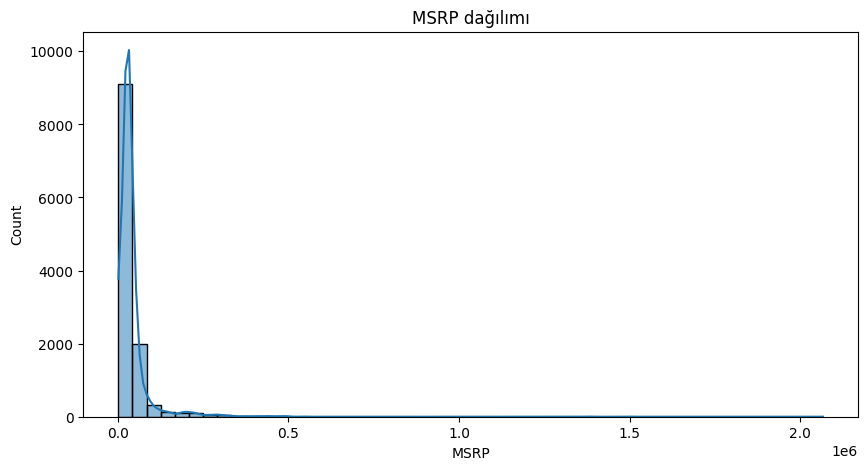

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.histplot(dataset["MSRP"],bins = 50, kde = True)
plt.title("MSRP dağılımı")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'log Sonrası MSRP Dönüşümü')

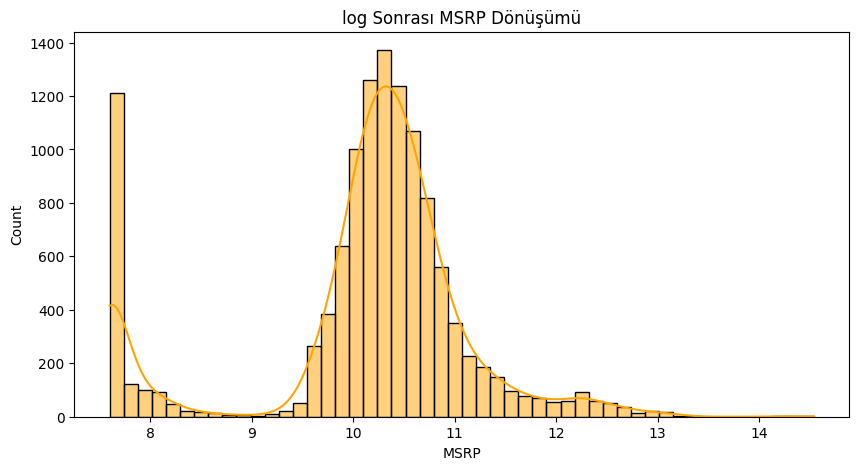

In [42]:
plt.figure(figsize = (10,5))
sns.histplot(np.log1p(dataset["MSRP"]), bins = 50,kde = True, color = "orange")
plt.title("log Sonrası MSRP Dönüşümü")

In [43]:
dataset["MSRP"] = np.log1p(dataset["MSRP"])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

x = dataset.drop(columns = ["MSRP"])
y = dataset["MSRP"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
y_pred_linear = model_linear.predict(x_test)

y_test_org = np.exp(y_test)
y_pred_linear_org = np.exp(y_pred_linear)

mse = mean_squared_error(y_pred_linear,y_test)
mae = mean_absolute_error(y_pred_linear,y_test)
r2s = r2_score(y_pred_linear,y_test)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2S: ",r2s)

MSE:  0.20316313001239425
MAE:  0.3324665598059241
R2S:  0.7990015090863616


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [None,10,20],
    "min_samples_split" : [2,5,7],
    "min_samples_leaf" : [1,2,3]    
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0),param_grid,cv=3)
grid_search.fit(x_train,y_train)

grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [62]:
model_final = RandomForestRegressor(max_depth = 20,min_samples_leaf = 1,min_samples_split = 2,n_estimators = 200)
model_final.fit(x_train,y_train)
y_pred_random = model_final.predict(x_test)

mse = mean_squared_error(y_pred_random,y_test)
mae = mean_absolute_error(y_pred_random,y_test)
r2s = r2_score(y_pred_random,y_test)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2S: ",r2s)

y_pred_real = np.exp(y_pred_random)
y_test_real = np.exp(y_test)

print("Gerçek MSE:", mean_squared_error(y_test_real, y_pred_real))
print("Gerçek MAE:", mean_absolute_error(y_test_real, y_pred_real))
print("Gerçek R2:", r2_score(y_test_real, y_pred_real))

MSE:  0.012717903313980513
MAE:  0.07620767710884989
R2S:  0.9892851353811212
Gerçek MSE: 84015138.1954822
Gerçek MAE: 3319.89860901953
Gerçek R2: 0.9588324888060272
